**The dataset comprises of sales transactions captured at a retail store.It's a classic dataset to explore and expand the feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550069 rows and 12 columns.**

**PROBLEM : Predict purchase amount.**
**So, across different users and product ids we should be able to predict how many items of a particular kind were bought.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape


(550068, 12)

In [4]:
df.describe() #statistical info

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.info() #datatype info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.apply(lambda x: len(x.unique())) #finding unique values in each column

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,18


Exploratory Data Analysis

<Figure size 1300x700 with 0 Axes>

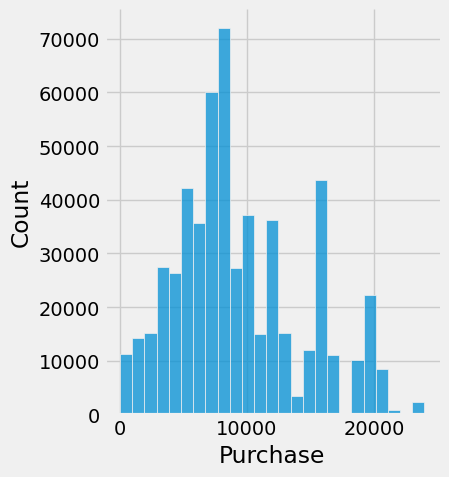

In [7]:
#displot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.displot(df['Purchase'],bins = 25)

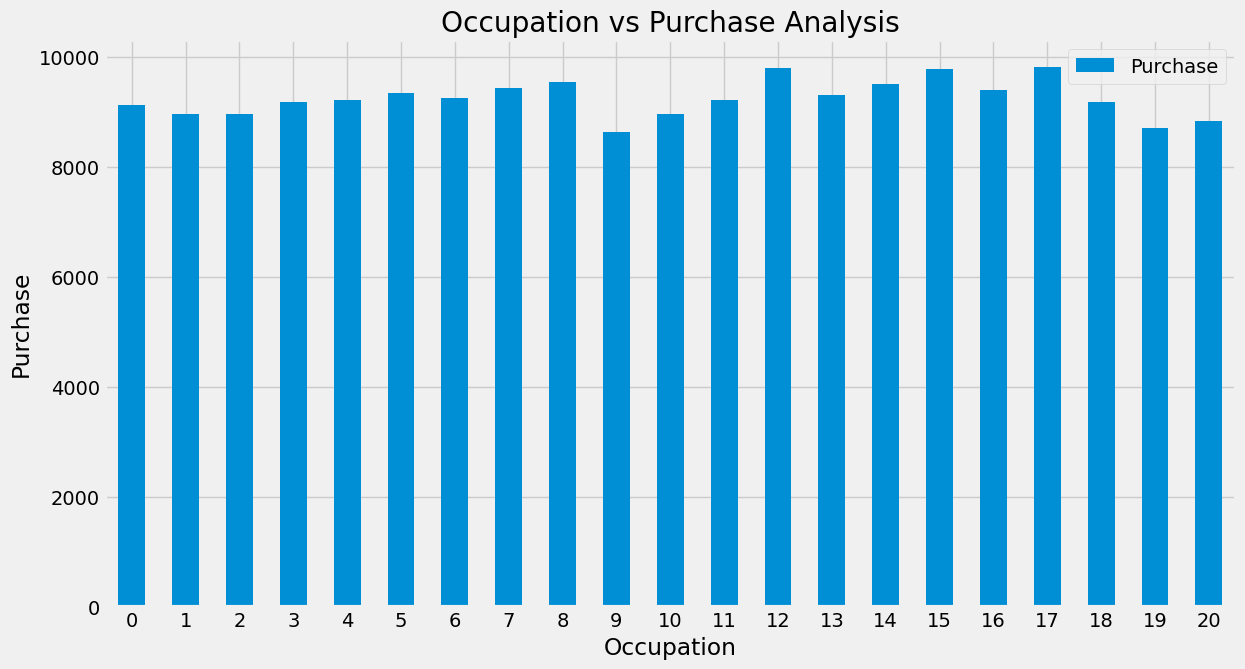

In [8]:
#bivariate analysis to analyze does occupation affect purchase
#which occupation has the highest average purchase amount.
occupation_plot = df.pivot_table(index='Occupation',values='Purchase',aggfunc=np.mean) #finding mean of all the purchase values for each occupation
occupation_plot.plot(kind = 'bar', figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title("Occupation vs Purchase Analysis")
plt.xticks(rotation = 0)
plt.show()

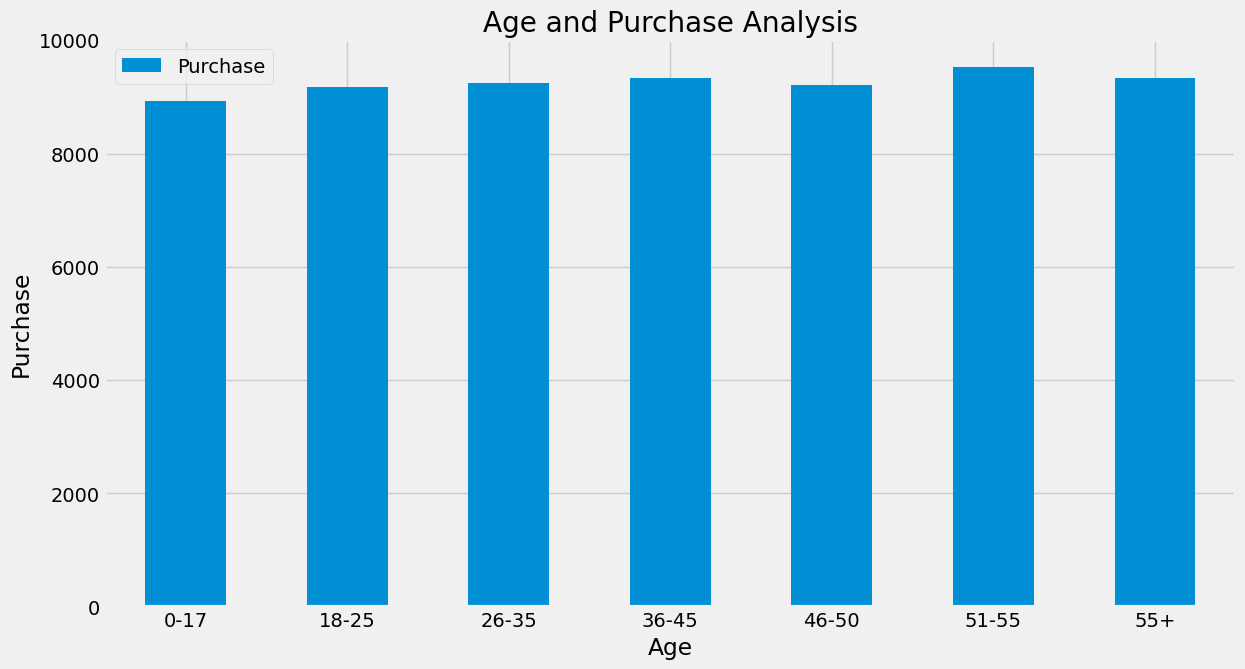

In [9]:
#Which age group is spending maximum on purchase
#Age 51-55 has the highest purchase amount
age_plot = df.pivot_table(index='Age',values='Purchase',aggfunc=np.mean) #finding mean of all the purchase values for each age
age_plot.plot(kind = 'bar', figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title("Age and Purchase Analysis")
plt.xticks(rotation = 0)
plt.show()

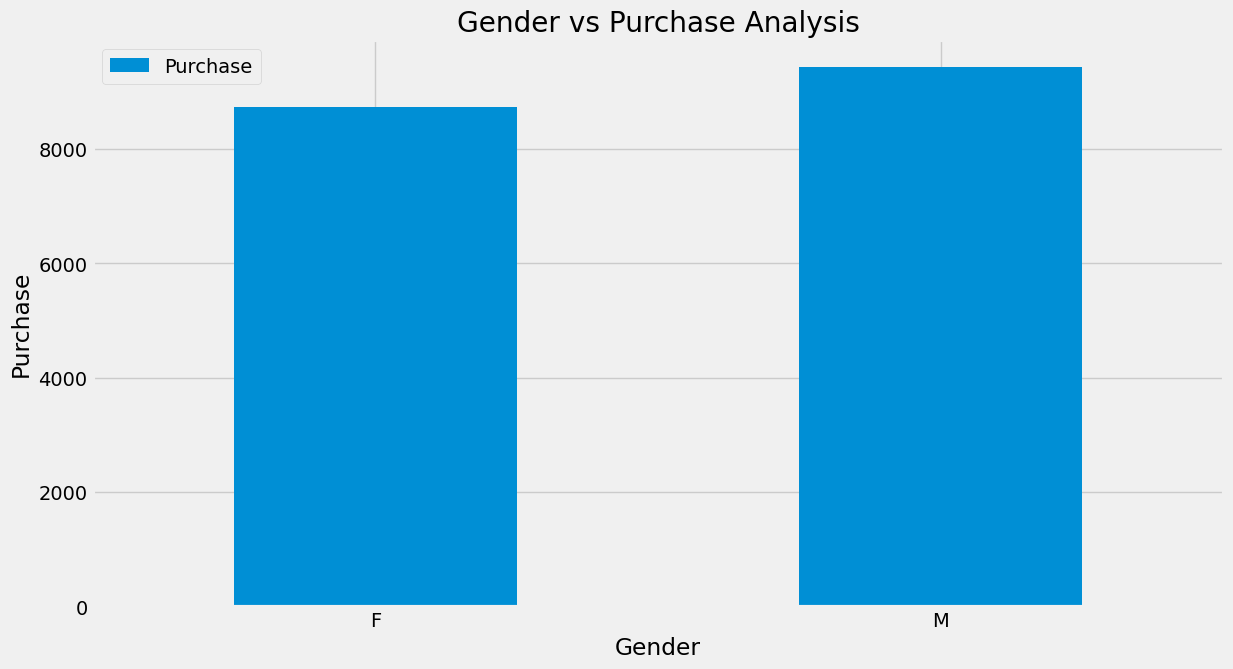

In [10]:
gender_plot = df.pivot_table(index='Gender',values='Purchase',aggfunc=np.mean) #finding mean of all the purchase values for each occupation
gender_plot.plot(kind = 'bar', figsize=(13,7))
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.title("Gender vs Purchase Analysis")
plt.xticks(rotation = 0)
plt.show()

Data Preprocessing

In [11]:
#Check for NULL Values
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


In [12]:
#In product category 2 and 3 there are NULL Values, so we need to handle those.
#Here we filled the NULL Values with -2.0
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [13]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [14]:
#Encoding values using dict
gender_dict = {'F':0,'M':1} #converting gender column from 'M' and 'F' to 0 and 1
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [15]:
#to improve the metric using one hot encoding
#label encoding
cols = ['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


**CORRELATION MATRIX**

<Axes: >

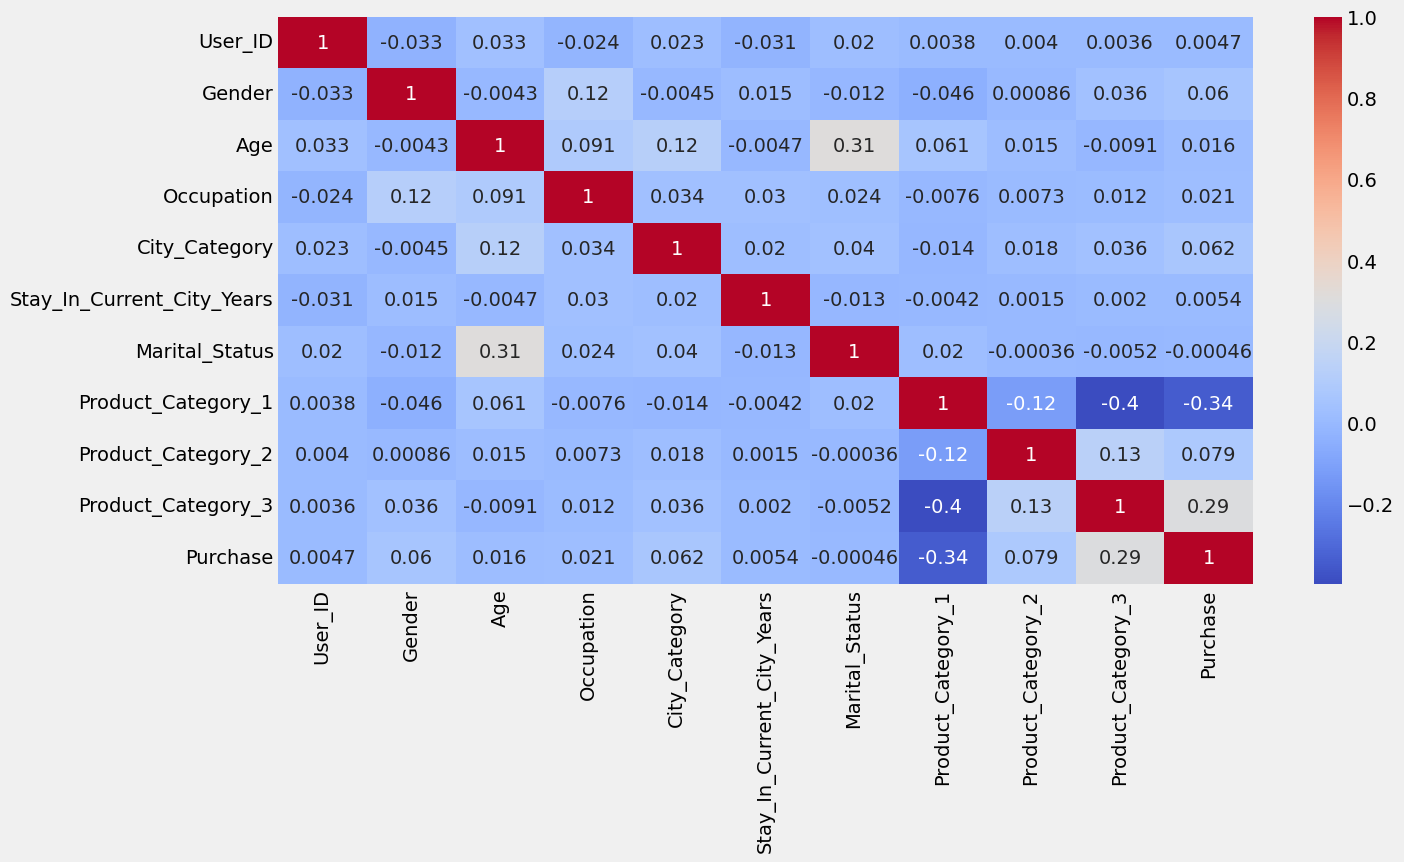

In [16]:
#To understand how are variables related with each other; higher the correlation, darker is the color
#Prod_category 1 and 3 have -ve correlation which means that if prod_category 1 increases, product category 3 decreases, indicating ain inverse relationship
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [17]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [18]:
x = df.drop(columns=['User_ID','Product_ID','Purchase']) #input variable
y = df['Purchase'] #prediction variable


In [19]:
x

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,-2.0,-2.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,-2.0,-2.0
3,0,0,10,0,2,0,12,14.0,-2.0
4,1,6,16,2,4,0,8,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,-2.0,-2.0
550064,0,2,1,2,3,0,20,-2.0,-2.0
550065,0,2,15,1,4,1,20,-2.0,-2.0
550066,0,6,1,2,2,0,20,-2.0,-2.0


**Model Training**

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
def train(model,x,y):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  #Cross validation
  cv_score = cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
  cv_score = np.abs(np.mean(cv_score))
  print("Results")
  print("MSE: ",np.sqrt(mean_squared_error(y_test,pred)))
  print("CV Score: ",np.sqrt(cv_score))

Results
MSE:  4617.994034201719
CV Score:  4625.252945835688


<Axes: title={'center': 'Model Coefficients'}>

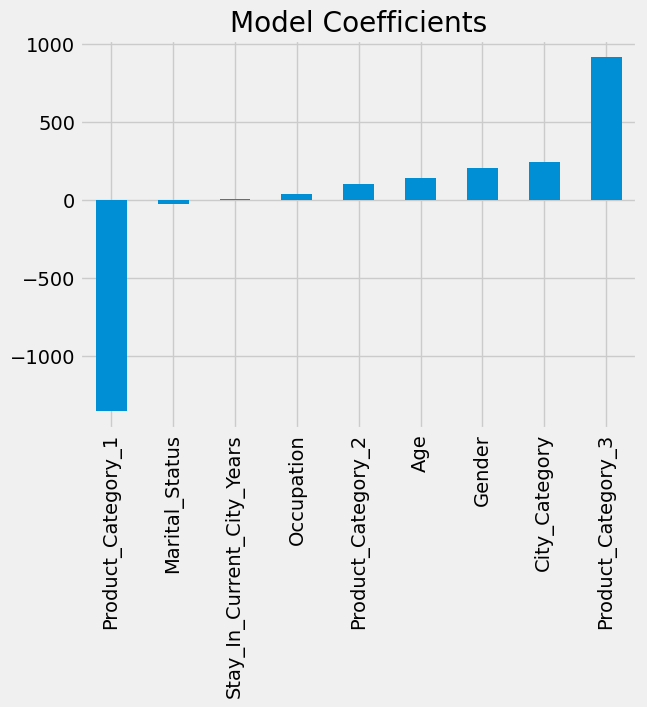

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(with_mean=False),LinearRegression())
train(model,x,y)
coef = pd.Series(model.named_steps['linearregression'].coef_,index=x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE:  3367.450367011316
CV Score:  3339.4987617647625


<Axes: title={'center': 'Feature Importance'}>

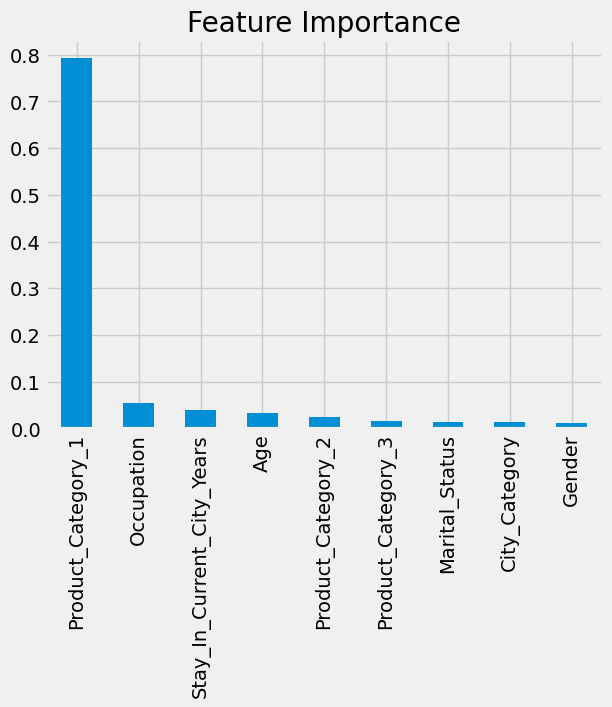

In [28]:
#Which input affects the output the most
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
train(model,x,y)
features = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')